# `darkemu` module tutorial notebook

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
from dark_emulator import darkemu

In [4]:
emu = darkemu.base_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


## how to set cosmology

In [5]:
cparam = np.array([0.02225,0.1198,0.6844,3.094,0.9645,-1.])
emu.set_cosmology(cparam)

## how to plot halo-mass cross correlation for mass threshold halo samples

Text(0, 0.5, '$\\xi_\\mathrm{hm}(x)$')

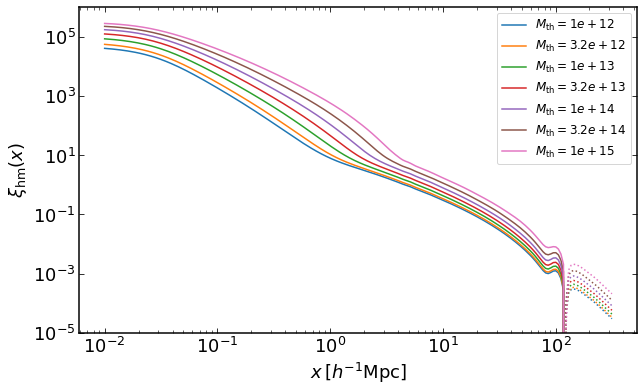

In [6]:
rs = np.logspace(-2,2.5,200)

plt.figure(figsize=(10,6))

z = 0

for i, Mmin in enumerate(np.logspace(12,15,7)):
    xihm = emu.get_xicross_massthreshold(rs,Mmin,z)
    plt.loglog(rs,xihm,color="C{}".format(i),label='$M_\mathrm{th}=%0.2g$' %Mmin)
    plt.loglog(rs,-xihm,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.ylim(0.00001,1000000)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hm}(x)$")


## how to plot DeltaSigma(R) for a mass threshold halo samples

Text(0, 0.5, '$\\Delta\\Sigma(r_p)\\,[h M_\\odot \\mathrm{pc}^{-2}]$')

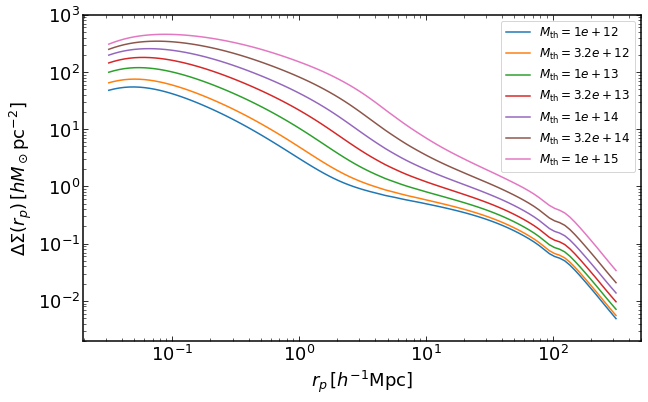

In [7]:
rs = np.logspace(-1.5,2.5,100)

plt.figure(figsize=(10,6))

z = 0

for i, Mmin in enumerate(np.logspace(12,15,7)):
    dsigma = emu.get_DeltaSigma_massthreshold(rs,Mmin,z)
    plt.loglog(rs,dsigma,label='$M_\mathrm{th}=%0.2g$' %Mmin)
plt.legend(fontsize=12)
plt.ylim(0.002,1000)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\Delta\Sigma(r_p)\,[h M_\odot \mathrm{pc}^{-2}]$")


## how to plot halo-halo correlation for mass threshold halo samples

Text(0, 0.5, '$\\xi_\\mathrm{hh}(x)$')

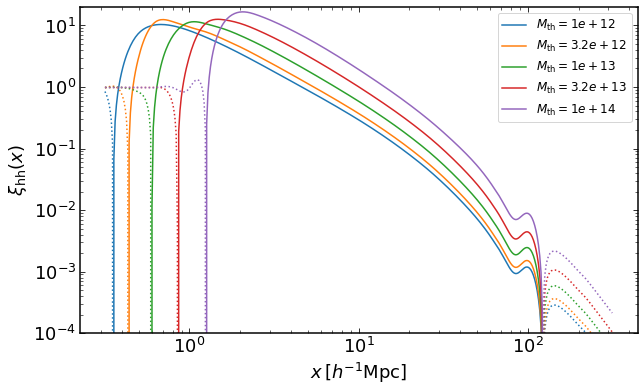

In [8]:
rs = np.logspace(-0.5,2.5,400)

plt.figure(figsize=(10,6))

z = 0

for i, Mmin in enumerate(np.logspace(12,14,5)):
    xih = emu.get_xiauto_massthreshold(rs,Mmin,z)
    plt.loglog(rs,xih,color="C{}".format(i),label='$M_\mathrm{th}=%0.2g$' %Mmin)
    plt.loglog(rs,-xih,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.ylim(0.0001,20)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hh}(x)$")


## how to plot halo-halo projected correlation function for mass threshold halo samples

Text(0, 0.5, '$w_\\mathrm{hh}(r_p)\\,[h^{-1}\\mathrm{Mpc}]$')

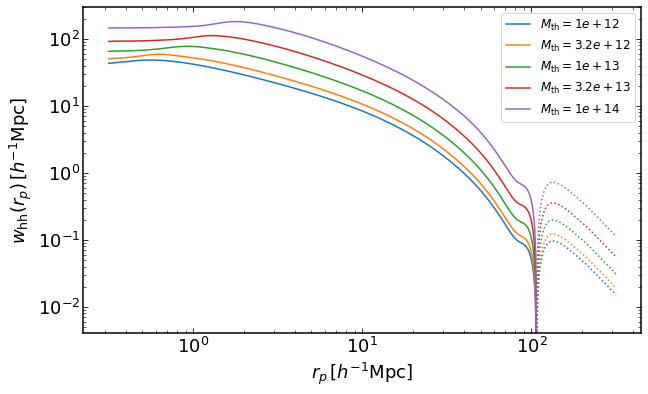

In [9]:
rs = np.logspace(-0.5,2.5,400)

z = 0

plt.figure(figsize=(10,6))

for i, Mmin in enumerate(np.logspace(12,14,5)):
    wh = emu.get_wauto_massthreshold(rs,Mmin,z)
    plt.loglog(rs,wh,color="C{}".format(i),label='$M_\mathrm{th}=%0.2g$' %Mmin)
    plt.loglog(rs,-wh,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$w_\mathrm{hh}(r_p)\,[h^{-1}\mathrm{Mpc}]$")


## Same as before, but for halos with fixed masses instead of mass threshold samples.

Text(0, 0.5, '$w_\\mathrm{hh}(r_p)\\,[h^{-1}\\mathrm{Mpc}]$')

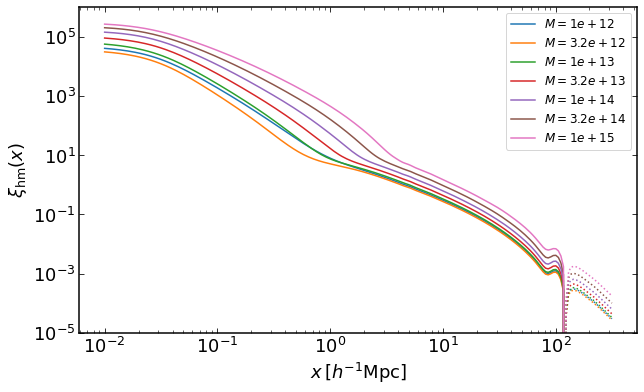

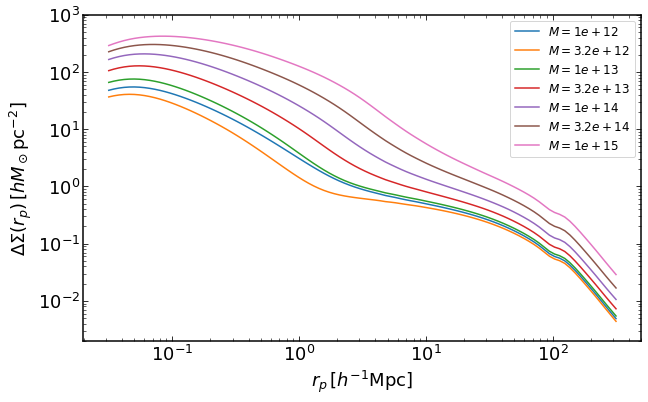

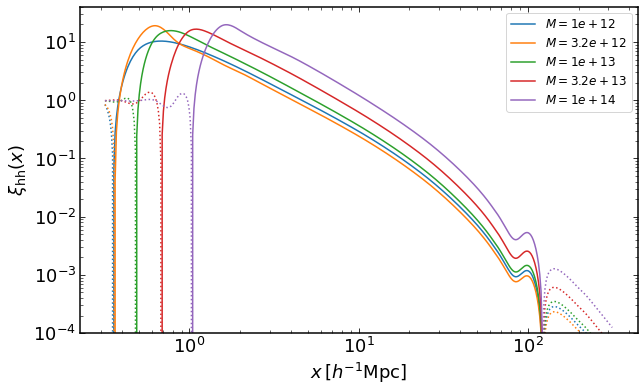

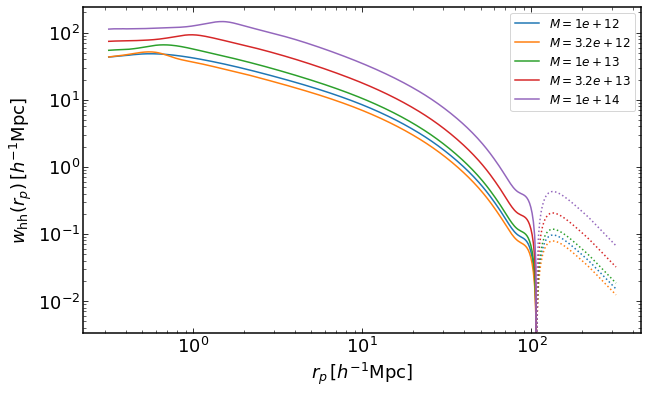

In [10]:
rs = np.logspace(-2,2.5,200)
plt.figure(figsize=(10,6))
for i, M in enumerate(np.logspace(12,15,7)):
    xihm = emu.get_xicross_mass(rs,M,z)
    plt.loglog(rs,xihm,color="C{}".format(i),label='$M=%0.2g$' %M)
    plt.loglog(rs,-xihm,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.ylim(0.00001,1000000)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hm}(x)$")

rs = np.logspace(-1.5,2.5,100)
plt.figure(figsize=(10,6))
for i, M in enumerate(np.logspace(12,15,7)):
    dsigma = emu.get_DeltaSigma_mass(rs,M,z)
    plt.loglog(rs,dsigma,label='$M=%0.2g$' %M)
plt.legend(fontsize=12)
plt.ylim(0.002,1000)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\Delta\Sigma(r_p)\,[h M_\odot \mathrm{pc}^{-2}]$")

rs = np.logspace(-0.5,2.5,400)
plt.figure(figsize=(10,6))
for i, M in enumerate(np.logspace(12,14,5)):
    xih = emu.get_xiauto_mass(rs,M,M,z)
    plt.loglog(rs,xih,color="C{}".format(i),label='$M=%0.2g$' %M)
    plt.loglog(rs,-xih,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.ylim(0.0001,40)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hh}(x)$")

rs = np.logspace(-0.5,2.5,400)
plt.figure(figsize=(10,6))
for i, M in enumerate(np.logspace(12,14,5)):
    wh = emu.get_wauto_mass(rs,M,M,z)
    plt.loglog(rs,wh,color="C{}".format(i),label='$M=%0.2g$' %M)
    plt.loglog(rs,-wh,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$w_\mathrm{hh}(r_p)\,[h^{-1}\mathrm{Mpc}]$")

## Halo-halo correlation function for halos with 2 different masses

Text(0, 0.5, '$w_\\mathrm{hh}(r_p)\\,[h^{-1}\\mathrm{Mpc}]$')

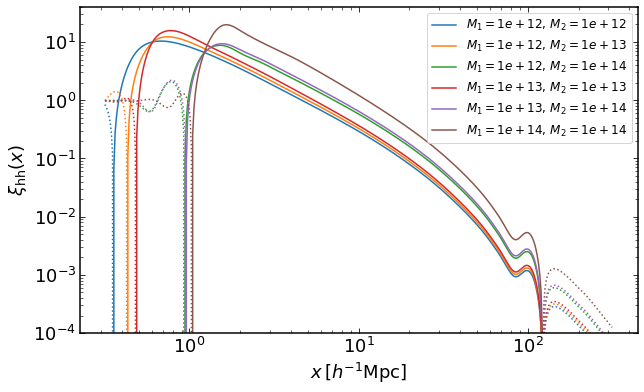

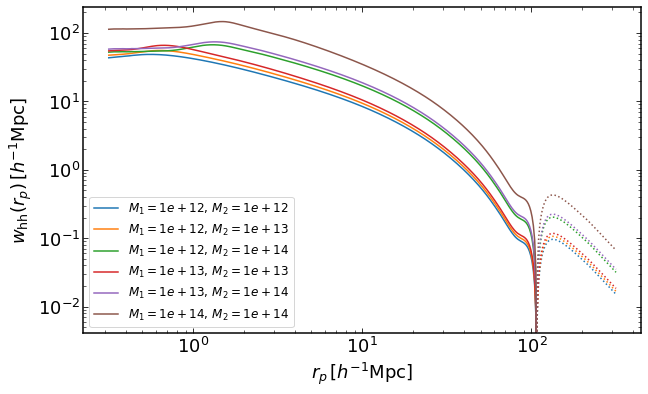

In [11]:
rs = np.logspace(-0.5,2.5,400)
Ms = np.logspace(12,14,3)
plt.figure(figsize=(10,6))
ii = 0
for i in range(3):
    for j in range(i,3):
        xih = emu.get_xiauto_mass(rs,Ms[i],Ms[j],z)
        plt.loglog(rs,xih,color="C{}".format(ii),label='$M_1=%0.2g,\,M_2=%0.2g$' %(Ms[i],Ms[j]))
        plt.loglog(rs,-xih,':',color="C{}".format(ii))
        ii+=1
plt.legend(fontsize=12)
plt.ylim(0.0001,40)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hh}(x)$")

rs = np.logspace(-0.5,2.5,400)
plt.figure(figsize=(10,6))
ii = 0
for i in range(3):
    for j in range(i,3):
        wh = emu.get_wauto_mass(rs,Ms[i],Ms[j],z)
        plt.loglog(rs,wh,color="C{}".format(ii),label='$M_1=%0.2g,\,M_2=%0.2g$' %(Ms[i],Ms[j]))
        plt.loglog(rs,-wh,':',color="C{}".format(ii))
        ii+=1
plt.legend(fontsize=12)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$w_\mathrm{hh}(r_p)\,[h^{-1}\mathrm{Mpc}]$")

## Projected Halo-halo correlation function with finite projection widths
This takes more time because of an additional direct integration, which is bypassed by using pyfftlog in other routines.

(0.01, 100)

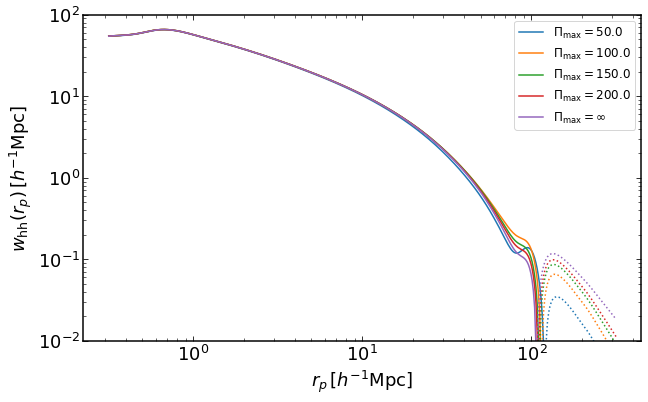

In [13]:
plt.figure(figsize=(10,6))
ii = 0
M = 1e13

for i, pimax in enumerate(np.linspace(50,200,4)):
    wh = emu.get_wauto_mass_cut(rs,M,M,z,pimax)
    plt.loglog(rs,wh,color="C{}".format(i),label='$\Pi_\mathrm{max}=%.1f$' %(pimax))
    plt.loglog(rs,-wh,':',color="C{}".format(i))

wh = emu.get_wauto_mass(rs,M,M,z)
plt.loglog(rs,wh,color="C{}".format(4),label='$\Pi_\mathrm{max}=\infty$')
plt.loglog(rs,-wh,':',color="C{}".format(4))

plt.legend(fontsize=12)
plt.xlabel("$r_p\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$w_\mathrm{hh}(r_p)\,[h^{-1}\mathrm{Mpc}]$")
plt.ylim(0.01,100)